In [1]:
import sys
from pathlib import Path

# Go two levels up to reach project root
project_root = Path.cwd().parents[1]  # from subfolder/ to notebook_folder/ to project_root/
scripts_path = project_root / "scripts"

if str(project_root) not in sys.path:
    sys.path.insert(0, str(project_root))

In [2]:
from scripts.general_scripts.features_engineering import quicky_data, lag_features_indicators
from scripts.general_scripts.pipelines import price_model
from scripts.general_scripts.predict import future_price_prediction
from scripts.general_scripts.lstm import LSTMModelMultiStep, LSTMModelMultiOutput
from scripts.general_scripts.helper import CustomizedLoss
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [3]:
scaler = StandardScaler()
model_type = LSTMModelMultiOutput
criterion = CustomizedLoss()
n_lags = 5
n_forecasts = 2
seasonal_periods = 261

Seasonality Strength: 0.08


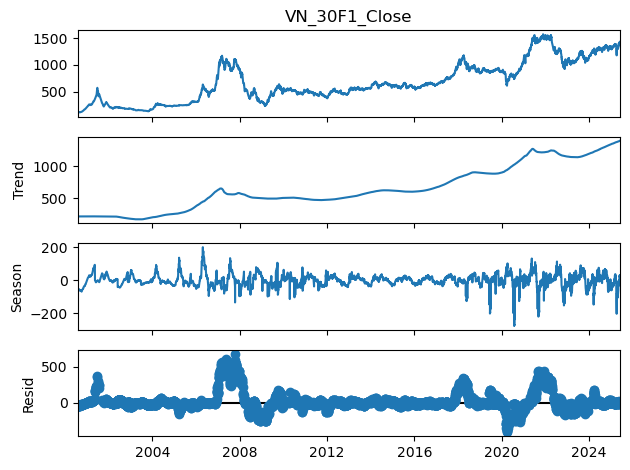

<Figure size 1200x400 with 0 Axes>

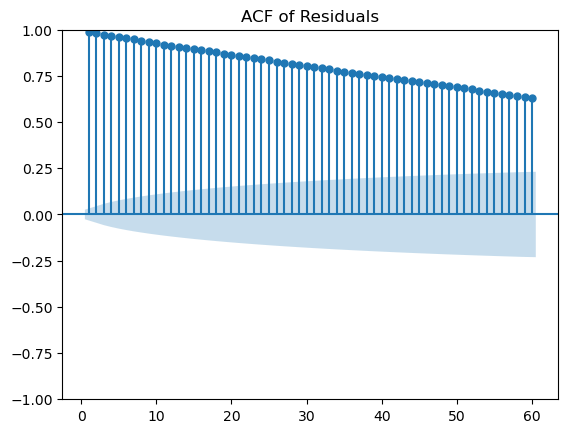

,VN_30F1_Close,trend,seasonal,residual,dow_sin,dow_cos,month_sin,month_cos
Date,,,,,,,,
2025-05-22,1402.0,1399.135938,-7.102030,9.966092,0.433884,-0.900969,0.866025,-0.500000
2025-05-23,1406.5,1399.733863,3.380057,3.386080,-0.433884,-0.900969,0.866025,-0.500000
2025-05-26,1416.5,1400.331819,13.575509,2.592672,0.000000,1.000000,0.866025,-0.500000
2025-05-27,1415.5,1400.929805,19.764185,-5.193990,0.781831,0.623490,0.866025,-0.500000
2025-05-28,1421.2,1401.527821,26.102251,-6.430073,0.974928,-0.222521,0.866025,-0.500000
2025-05-29,1423.7,1402.125868,29.922049,-8.347917,0.433884,-0.900969,0.866025,-0.500000
2025-05-30,1419.5,1402.723944,20.897527,-4.121471,-0.433884,-0.900969,0.866025,-0.500000
2025-06-02,1415.1,1403.322049,17.769450,-5.991499,0.000000,1.000000,0.500000,-0.866025
2025-06-03,1434.9,1403.920184,29.559804,1.420012,0.781831,0.623490,0.500000,-0.866025


In [4]:
# 📂 Load dataset
file_path_1 = "../../ready_data/vn_30_data/cleaned_vn_30f1_data.csv"
df_1 = pd.read_csv(file_path_1)
df_1 = quicky_data(df_1, seasonal_periods)
df_1.tail(10)

/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5685    1436.588602
dtype: float64
Hello
5685    32.065344
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


5685    1404.518318
dtype: float64
[DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-04'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-04 00:00:00
(5681, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0984 - Val Loss: 0.0013
Test Loss: 0.0007
5685    1437.552989
dtype: float64
Date
2025-06-04    1430.000001
dtype: float64
(1,)
1 1 1
RMSE: 7.5530, MAE: 7.5530, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


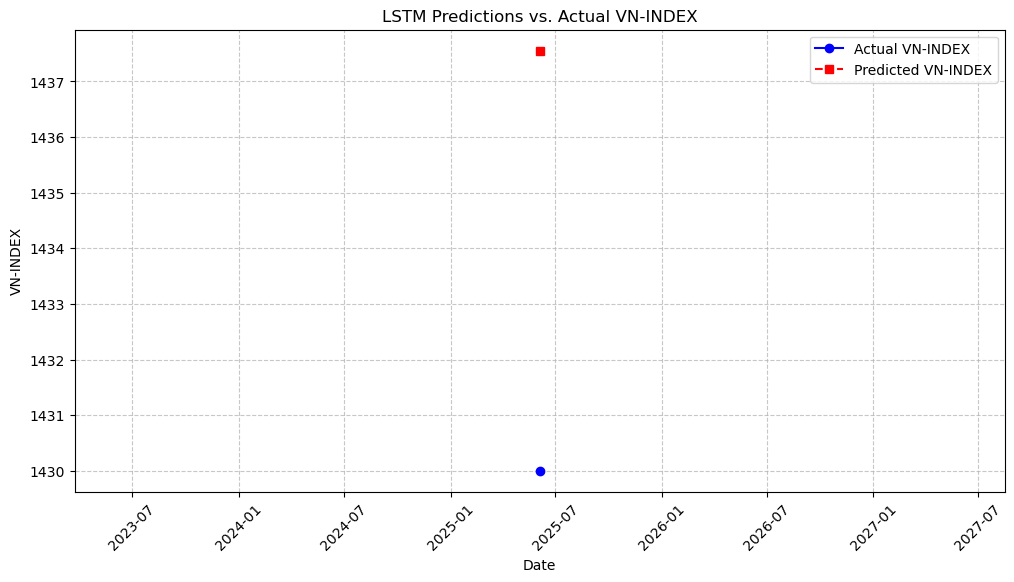

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-04      1430.000001         1437.552989


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5684    1415.735991
dtype: float64
Hello
5684    29.578194
dtype: float64
5684    1403.920154
dtype: float64
[DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-03 00:00:00
(5680, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0989 - Val Loss: 0.0003
Test Loss: 0.0012
5684    1428.859745
dtype: float64
Date
2025-06-03    1434.9
dtype: float64
(1,)
1 1 1
RMSE: 6.0403, MAE: 6.0403, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


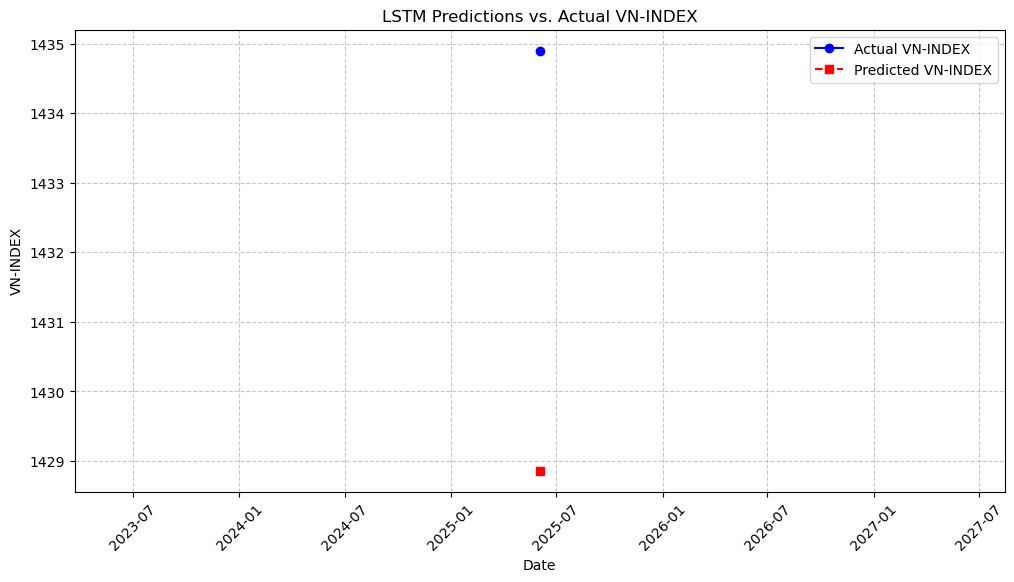

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03           1434.9         1428.859745


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5683    1423.954842
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5683    20.9065
dtype: float64
5683    1403.32202
dtype: float64
[DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-06-02 00:00:00
(5679, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0988 - Val Loss: 0.0002
Test Loss: 0.0002
5683    1420.761069
dtype: float64
Date
2025-06-02    1415.100002
dtype: float64
(1,)
1 1 1
RMSE: 5.6611, MAE: 5.6611, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


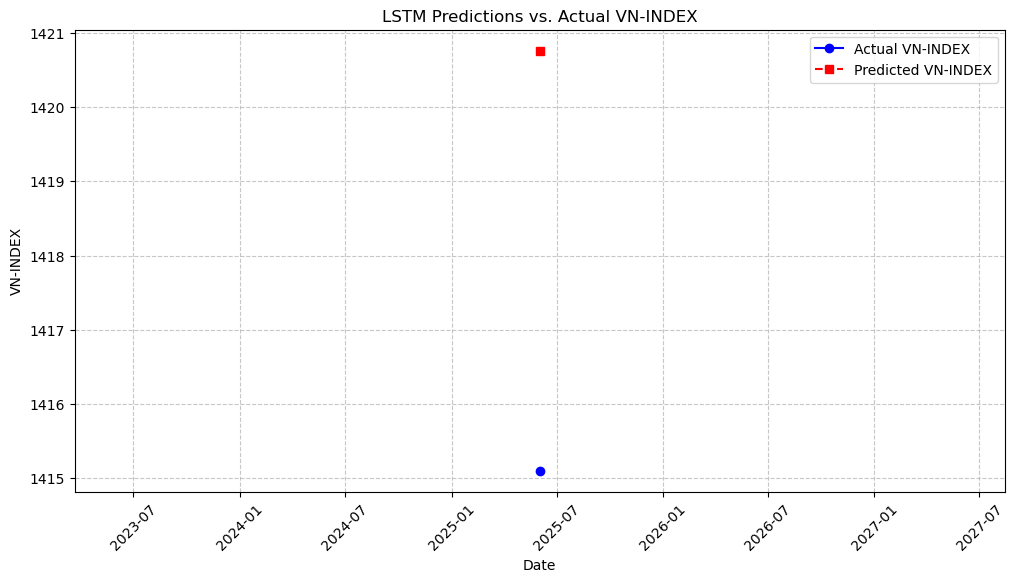

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-02      1415.100002         1420.761069


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5682    1422.15602
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5682    15.033878
dtype: float64
5682    1402.723914
dtype: float64
[DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-30 00:00:00
(5678, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0986 - Val Loss: 0.0003
Test Loss: 0.0002
5682    1411.436541
dtype: float64
Date
2025-05-30    1419.499997
dtype: float64
(1,)
1 1 1
RMSE: 8.0635, MAE: 8.0635, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


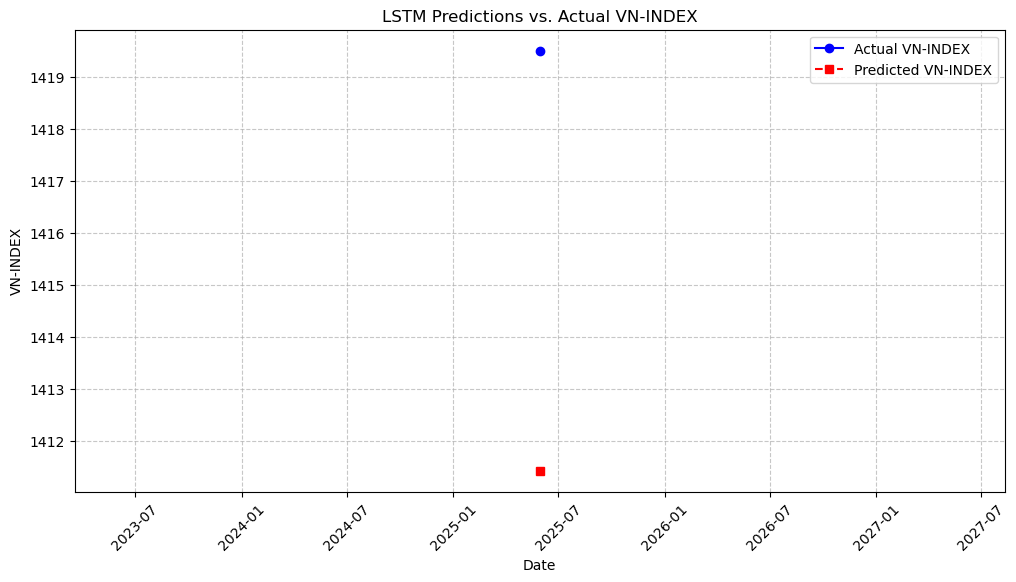

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-30      1419.499997         1411.436541


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5681    1421.033635
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5681    3.99477
dtype: float64
5681    1402.125838
dtype: float64
[DatetimeIndex(['2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-29 00:00:00
(5677, 5, 7)


/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.0991 - Val Loss: 0.0004
Test Loss: 0.0003
5681    1400.935529
dtype: float64
Date
2025-05-29    1423.699999
dtype: float64
(1,)
1 1 1
RMSE: 22.7645, MAE: 22.7645, R²: nan, Directional Accuracy: nan


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


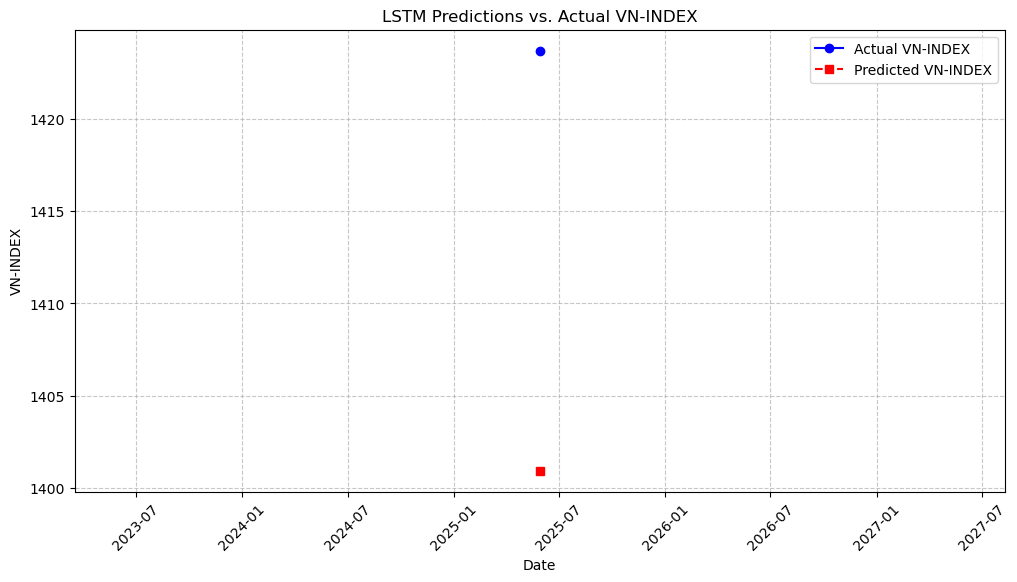

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-29      1423.699999         1400.935529


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5684    1415.735991
5685    1417.848319
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5684    29.578194
5685    32.408600
dtype: float64
5684    1403.920154
5685    1404.518260
dtype: float64
[DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6096 - Val Loss: 0.1005
Test Loss: 0.0004
5684    1430.284676
5685    1433.131909
dtype: float64
Date
2025-06-03    1434.900000
2025-06-04    1429.999999
dtype: float64
(2,)
2 2 2
RMSE: 3.9440, MAE: 3.8736, R²: -1.5914, Directional Accuracy: 0.0000


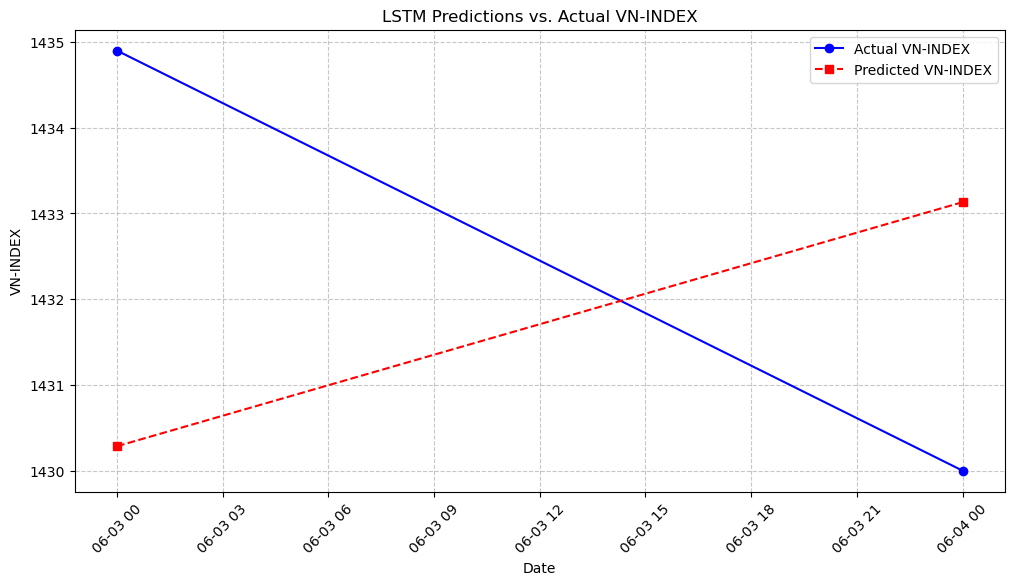

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03      1434.900000         1430.284676
1 2025-06-04      1429.999999         1433.131909


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5682    1422.156020
5683    1425.931599
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5682    15.033878
5683    15.787440
dtype: float64
5682    1402.723914
5683    1403.321960
dtype: float64
[DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6164 - Val Loss: 0.0002
Test Loss: 0.1001
5682    1411.105912
5683    1413.327487
dtype: float64
Date
2025-05-30    1419.499997
2025-06-02    1415.099998
dtype: float64
(2,)
2 2 2
RMSE: 6.0664, MAE: 5.0833, R²: -6.6036, Directional Accuracy: 0.0000


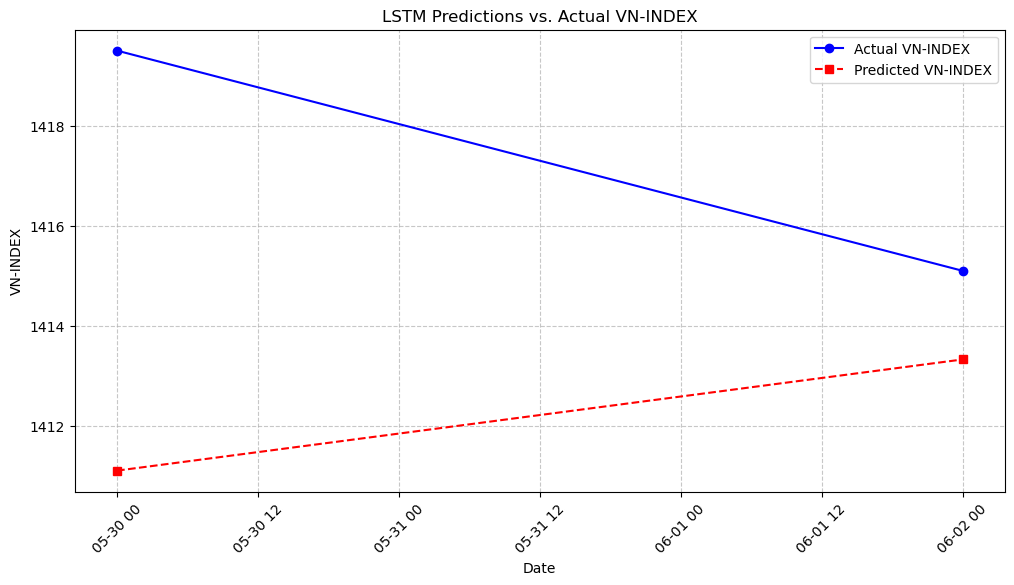

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-30      1419.499997         1411.105912
1 2025-06-02      1415.099998         1413.327487


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5680    1417.636224
5681    1417.333520
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5680    -2.203300
5681   -11.942298
dtype: float64
5680    1401.527791
5681    1402.125777
dtype: float64
[DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6049 - Val Loss: 0.0028
Test Loss: 0.1009
5680    1396.687661
5681    1388.184374
dtype: float64
Date
2025-05-28    1421.200002
2025-05-29    1423.700001
dtype: float64
(2,)
2 2 2
RMSE: 30.5141, MAE: 30.0140, R²: -594.9089, Directional Accuracy: 0.0000


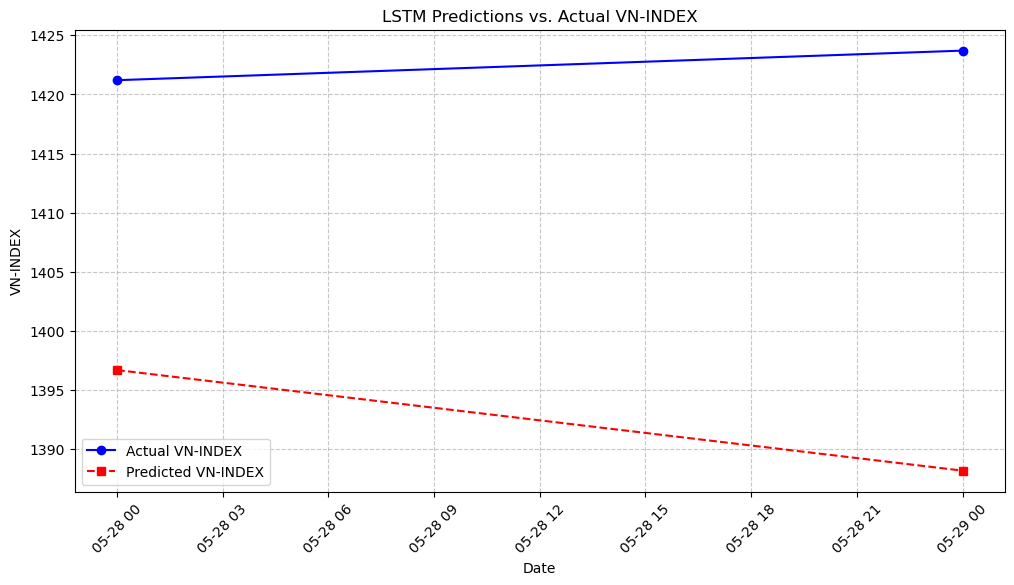

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-28      1421.200002         1396.687661
1 2025-05-29      1423.700001         1388.184374


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5678    1411.243832
5679    1412.314751
dtype: float64
Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5678   -19.395653
5679   -25.961271
dtype: float64
5678    1400.331788
5679    1400.929713
dtype: float64
[DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6200 - Val Loss: 0.0024
Test Loss: 0.0020
5678    1386.726159
5679    1380.420921
dtype: float64
Date
2025-05-26    1416.500000
2025-05-27    1415.499999
dtype: float64
(2,)
2 2 2
RMSE: 32.5348, MAE: 32.4265, R²: -4233.0388, Directional Accuracy: 1.0000


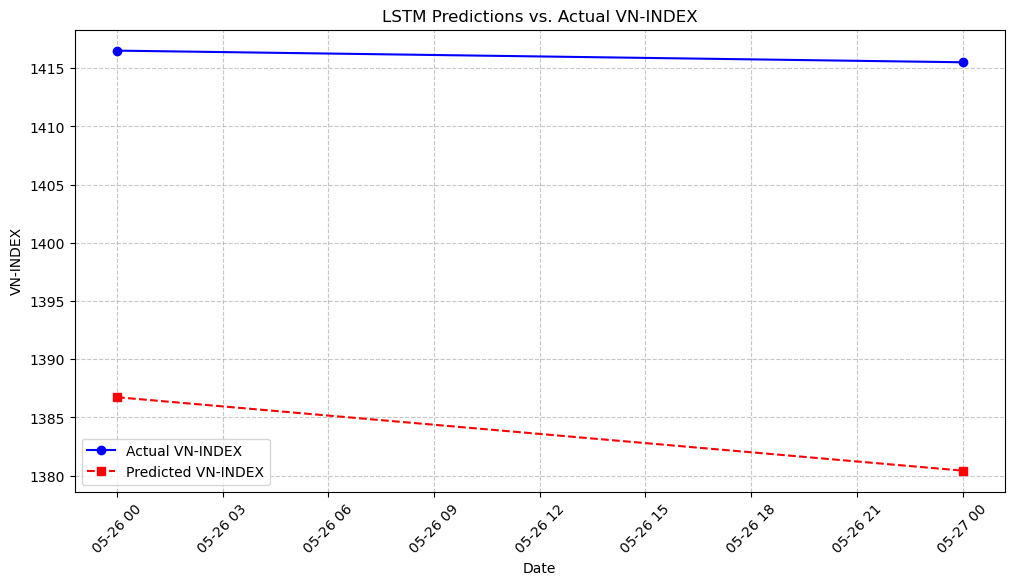

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-26      1416.500000         1386.726159
1 2025-05-27      1415.499999         1380.420921


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5676    1415.450363
5677    1417.068684
dtype: float64
Hello
5676   -13.251223
5677   -27.447485
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/

5676    1399.135907
5677    1399.733769
dtype: float64
[DatetimeIndex(['2025-05-09', '2025-05-12'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-12', '2025-05-13'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-13', '2025-05-14'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-14', '2025-05-15'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-15', '2025-05-16'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-16', '2025-05-19'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-19', '2025-05-20'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-20', '2025-05-21'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None)]
2025-05-23 00:

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.5978 - Val Loss: 0.0003
Test Loss: 0.0017
5676    1399.396658
5677    1385.335403
dtype: float64
Date
2025-05-22    1402.0
2025-05-23    1406.5
dtype: float64
(2,)
2 2 2
RMSE: 15.0784, MAE: 11.8840, R²: -43.9104, Directional Accuracy: 0.0000


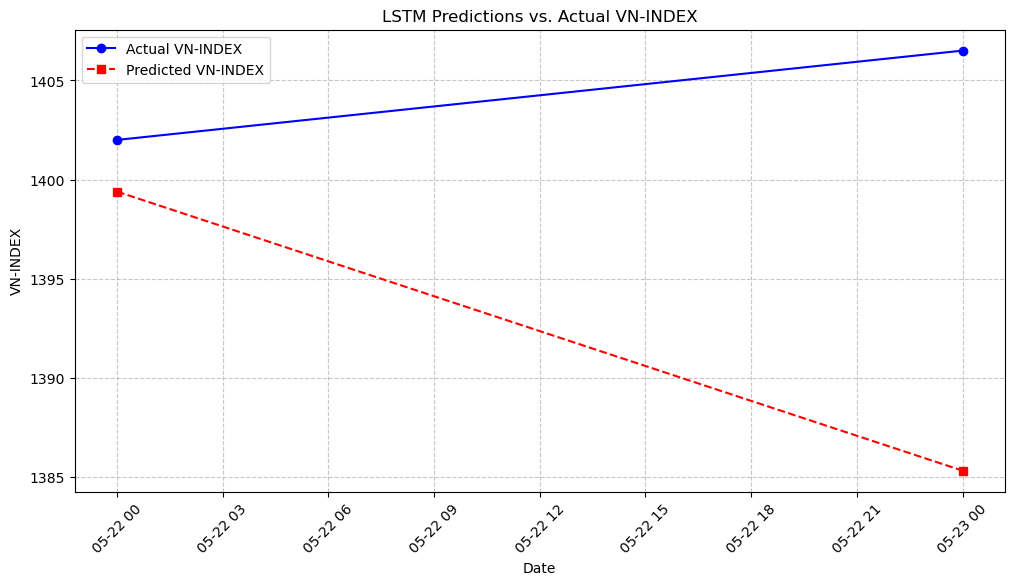

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-05-22           1402.0         1399.396658
1 2025-05-23           1406.5         1385.335403


In [5]:
# Testing
for n_forecasts in range(1, 3):
    for i in range(5):
        baseline = ExponentialSmoothing(
        df_1['VN_30F1_Close'].iloc[:-n_forecasts*(i+1)],
        trend='add',            # additive trend
        seasonal='add',         # additive seasonality
        seasonal_periods=seasonal_periods    # one business‐year ≈ seasonal_periods days
        ).fit()

        # 2) Forecast the next day (one‐step ahead):
        price_forecast = baseline.forecast(n_forecasts)

        # 3) If you want to extract the trend/seasonal forecasts separately:
        fitted_components = baseline.fittedvalues  # this is price = level+trend+seasonal
        level = baseline.level                     # the “smoothed level” ≈ trend
        seasonal = baseline.season                 # the seasonal factors

        print(price_forecast)

        data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]

        if i:
            data = data.iloc[:-n_forecasts*i]
        # 🚀 Train the model and get the test set
        model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecasts, seasonal_periods=seasonal_periods, epochs=50)

    # 🔮 Generate future predictions
    # future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecast)

Hello


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5684    29.578194
5685    32.408600
dtype: float64
5684    1403.920154
5685    1404.518260
dtype: float64
[DatetimeIndex(['2025-05-21', '2025-05-22'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-22', '2025-05-23'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-23', '2025-05-26'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-26', '2025-05-27'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-27', '2025-05-28'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-28', '2025-05-29'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-29', '2025-05-30'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-05-30', '2025-06-02'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-02', '2025-06-03'], dtype='datetime64[ns]', name='Date', freq=None), DatetimeIndex(['2025-06-03', '2025-06-04'], dtype='datet

/opt/anaconda3/lib/python3.11/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Final: Training Loss: 0.6096 - Val Loss: 0.1005
Test Loss: 0.0004
5684    1430.284676
5685    1433.131909
dtype: float64
Date
2025-06-03    1434.900000
2025-06-04    1429.999999
dtype: float64
(2,)
2 2 2
RMSE: 3.9440, MAE: 3.8736, R²: -1.5914, Directional Accuracy: 0.0000


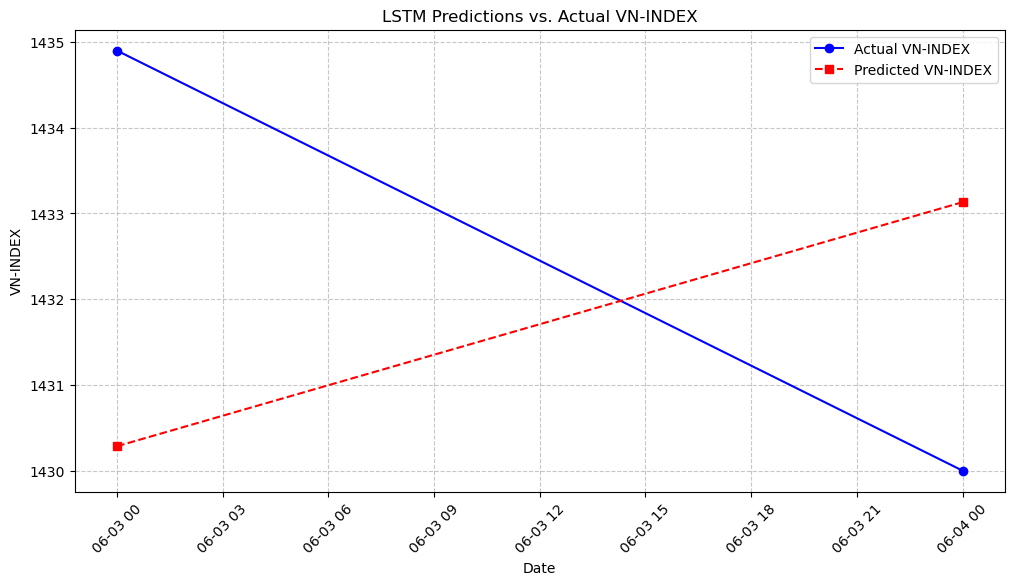

Predicted vs. Actual VN-INDEX (Test Set):
        Date  Actual VN-INDEX  Predicted VN-INDEX
0 2025-06-03      1434.900000         1430.284676
1 2025-06-04      1429.999999         1433.131909
torch.Size([1, 2, 1])


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_date

5686    1405.116511
5687    1405.714675
dtype: float64
5686    1457.339247
5687    1475.966467
dtype: float64


/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


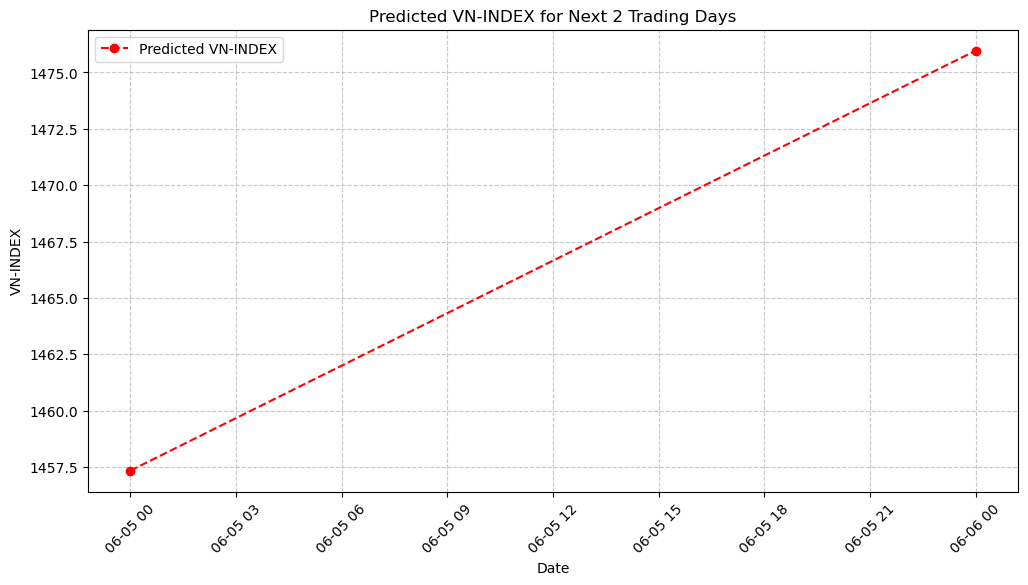

Date
2025-06-03    1434.9
2025-06-04    1430.0
dtype: float64


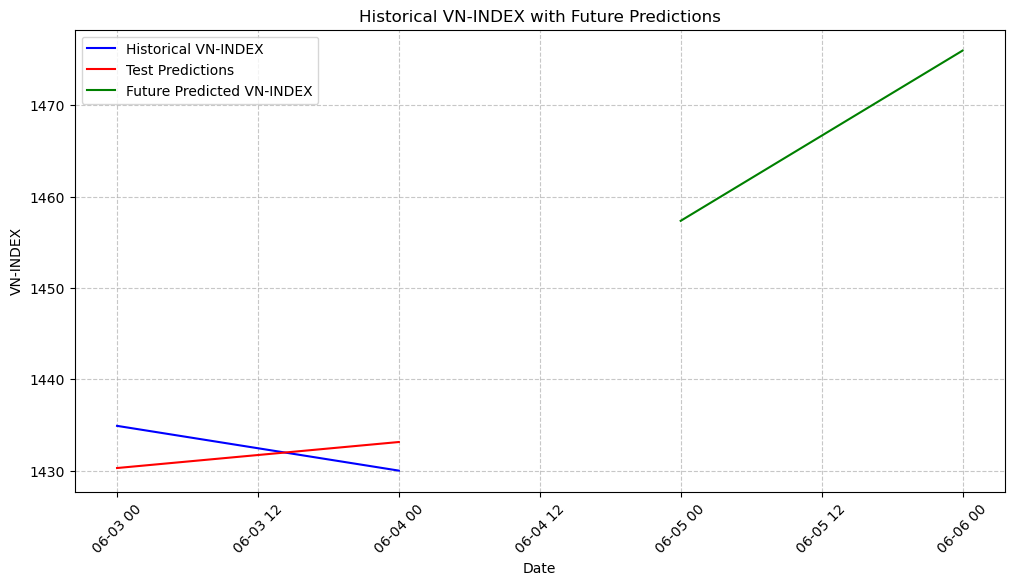

           Date  Predicted VN-INDEX
5686 2025-06-05         1457.339247
5687 2025-06-06         1475.966467


In [6]:
data = df_1[['residual', 'trend', 'seasonal', 'dow_sin', 'dow_cos', 'month_sin', 'month_cos']]
# 🚀 Train the model and get the test set
model, X_test_tensor, scaler, y_pred = price_model(data, scaler, model_type, criterion, tuning=False, train_seq_len=n_lags, test_seq_len=n_forecasts, epochs=50)

# 🔮 Generate future predictions
future_price_prediction(X_test_tensor, data, y_pred, scaler, model, num_days=n_forecasts)